We are going to use the famous iris data set for our KNN example. 


The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. 



These are the attributes of specific types of iris plant. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 


Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Question

Please import, preprocess the data, train-test split, feature scale it, make predictions, and please evaluate it. 

Please also calculate the error rate for K values of 1 to 40. 

In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

The next step is to plot the error values against K values.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
# import some data to play with
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
def knn(data, query, k, distance_fn, choice_fn):
    # generate a list where the distance and the indice of every point compared with the querry point is stored
    neighbor_distances_and_indices = []
    
    for i, example in enumerate(data):

        distance = distance_fn(example[:-1], query)
        
        neighbor_distances_and_indices.append((distance, i))
    
    #sort the neighbor_distances_and_indices list and get the k nearest neighbors
    k_nearest_neighbor = sorted(neighbor_distances_and_indices)[:k]
    
    #get the labels of the k nearest neighbors
    k_nearest_labels = [df.species[i] for distance, i in k_nearest_neighbor]
    
    return k_nearest_neighbor, choice_fn(k_nearest_labels)

In [4]:
def euclidean_distance(p1, p2):
    distance = 0
    for i in range(len(p1)):
        distance += (p1[i] - p2[i]) ** 2
    return np.sqrt(distance)

def mean(data):
    return sum(data)/len(data)

def mode(data):
    return Counter(data).most_common(1)[0][0]
    

In [47]:
query = [4.5, 1.8, 2.4, 0.2]
X = df.copy()
X.drop('species', axis=1, inplace=True)
X = X.values.tolist()
y = df.species.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [56]:
result = []
kvalue = []
for k in range(1,40):
    error = 0
    for i in range(len(X_test)):
        k_nearest_neighbors, prediction = knn(
            X_train, X_test[i], k, distance_fn=euclidean_distance, choice_fn=mode
        )
        if(prediction != y_test[i]):
            error = error + 1
    result.append(error / len(X_test))
    kvalue.append(k)
np.mean(result)

0.8213675213675211

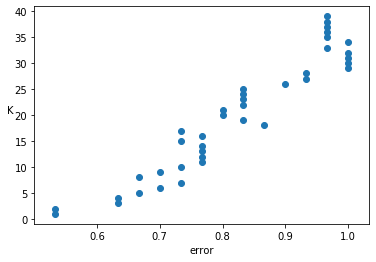

In [62]:
plt.scatter(x=result, y=kvalue)
plt.xlabel('error')
plt.ylabel('K', rotation=0);

It seems that a high K value leeds to overfit the model.